In [ ]:
import numpy
import matplotlib.pyplot as plt
import sys


In [ ]:
n = 2  
Y = numpy.array([[4, 5,6], [1, 2,3]], dtype=float)
print(Y)


[[4. 5. 6.]
 [1. 2. 3.]]


**Euclidean distance between two points**

$\sqrt d^2_{rs}= ||x_r − x_s||^2 =\sqrt{\Sigma^d_{j=1}(x^r_j− x^s_j)^2 }=\sqrt{\Sigma^d_{j=1}(x^r_j )^2 − 2\Sigma^d_{j=1}x^r_jx^s_j+\Sigma^d_{j=1}(x^s_j)^2} = \sqrt{brr + bss − 2br s}$

**Example**

$x_r=[4,5,6]  \  x_s=[1,2,3] \ d=1,2,3$

$d^2_{rs}= ||x_r − x_s||^2 =\Sigma^d_{j=1}(x^r_j− x^s_j)^2 =(4-1)^2+(5-2)^2+(6-3)^2= 3^2+3^2+3^2=\sqrt27=5.196$

$\sqrt{\Sigma^d_{j=1}(x^r_j )^2 − 2\Sigma^d_{j=1}x^r_jx^s_j+\Sigma^d_{j=1}(x^s_j)^2} =\sqrt{(4^2+5^2+6^2)-2((4*1)+(5*2)+(6*3))+(1^2+2^2+3^2)}=\sqrt{77-64+14}=\sqrt{27}=5.196$

$ \sqrt{b_{rr} + b_{ss} − 2b_{rs}}=\sqrt{77+14-64}=\sqrt27=5.196$

$d^2_{rr}= ||x_r − x_r||^2 =0$

$d^2_{ss}= ||x_s − x_s||^2 =0$

$ Distance Matrix=d^2_{rs}=
\begin{bmatrix}
 d^2_{rr} & d^2_{rs}\\ 
 d^2_{rs} & d^2_{ss}\\
 \end{bmatrix}=\begin{bmatrix}
 0 & 5.196\\ 
 5.196 & 0\\
 \end{bmatrix}$


In [ ]:
D = numpy.zeros((n, n), dtype=float)
for i in range(0, n):
    for j in range(0, n):
        D[i, j] = numpy.linalg.norm(Y[i,:] - Y[j,:]) 
print("\n euclidean Distance matrix \n",D)


 euclidean Distance matrix 
 [[0.         5.19615242]
 [5.19615242 0.        ]]


$d^2_{•s}= \frac{1}{N}\Sigma_rd^2_{rs} $

$ d^2_{r•} = \frac{1}{N}\Sigma_sd^2_{rs} $

$ d^2_{••} = \frac{1}{N}\Sigma_r\Sigma_sd^2$

$B_{rs} = \frac{1}{2}(d^2_{r•} + d^2_{•s}− d^2_{••} − d^2_{rs})$

WE USE Following equation to calculate B matrix from distance matrix

$B_{rs} = -\frac{1}{2}(d^2_{rs}-d^2_{r•} - d^2_{•s}+d^2_{••})$

In [ ]:
def bval(D, r, s):
    n = D.shape[0]
    print("\n n \n",n)
    total_r = numpy.sum(D[:,s] ** 2)
    print("\n total_r \n",total_r)
    
    

    total_s = numpy.sum(D[r,:] ** 2)
    print("\n total_s \n",total_s)
    print("\n D**2\n ",D**2)
    total = numpy.sum(D ** 2)
    print("\n total \n",total)
    val = (D[r,s] ** 2) - (float(total_r) / float(n)) - (float(total_s) / float(n)) + (float(total) / float(n * n))
    print("\n val \n",val)
    return -0.5 * val


In [ ]:
B = numpy.zeros((n, n), dtype=float)
for i in range(0, n):
    for j in range(0, n):
        B[i,j] = bval(D, i, j)
        print("\n B[i,j] \n",B[i,j],i,j)
print("\n B\n",B)


 n 
 2

 total_r 
 27.0

 total_s 
 27.0

 D**2
  [[ 0. 27.]
 [27.  0.]]

 total 
 54.0

 val 
 -13.5

 B[i,j] 
 6.75 0 0

 n 
 2

 total_r 
 27.0

 total_s 
 27.0

 D**2
  [[ 0. 27.]
 [27.  0.]]

 total 
 54.0

 val 
 13.5

 B[i,j] 
 -6.75 0 1

 n 
 2

 total_r 
 27.0

 total_s 
 27.0

 D**2
  [[ 0. 27.]
 [27.  0.]]

 total 
 54.0

 val 
 13.5

 B[i,j] 
 -6.75 1 0

 n 
 2

 total_r 
 27.0

 total_s 
 27.0

 D**2
  [[ 0. 27.]
 [27.  0.]]

 total 
 54.0

 val 
 -13.5

 B[i,j] 
 6.75 1 1

 B
 [[ 6.75 -6.75]
 [-6.75  6.75]]


##Centering Matrix

The centering matrix of size n is defined as the n-by-n matrix

${\displaystyle C_{n}=I_{n}-{\tfrac {1}{n}}J_{n}}$

where $I_n$ is Identity(diagonal) matrix of n ,$J_n$ is nxn matrix of all ones

$C_{1}={\begin{bmatrix}0\end{bmatrix}}$

$
{\displaystyle C_{2}=\left[{\begin{array}{rrr}1&0\\0&1\end{array}}\right]-{\frac {1}{2}}\left[{\begin{array}{rrr}1&1\\1&1\end{array}}\right]=\left[{\begin{array}{rrr}{\frac {1}{2}}&-{\frac {1}{2}}\\-{\frac {1}{2}}&{\frac {1}{2}}\end{array}}\right]}
$
$
{\displaystyle C_{3}=\left[{\begin{array}{rrr}1&0&0\\0&1&0\\0&0&1\end{array}}\right]-{\frac {1}{3}}\left[{\begin{array}{rrr}1&1&1\\1&1&1\\1&1&1\end{array}}\right]=\left[{\begin{array}{rrr}{\frac {2}{3}}&-{\frac {1}{3}}&-{\frac {1}{3}}\\-{\frac {1}{3}}&{\frac {2}{3}}&-{\frac {1}{3}}\\-{\frac {1}{3}}&-{\frac {1}{3}}&{\frac {2}{3}}\end{array}}\right]}$

$B=-1/2CD^2C$

 The multiplication on both sides creates a doubly centred matrix ${\displaystyle C_{m}\,X\,C_{n}},$ whose row and column means are equal to zero.



   B matrix is calculated above 

   X matrix is scaled matrix with lower dimensions

   The relation between B and X matrix is :

  $B = XX^T$

  Spectral decomposition of B is:

  $B=XX^T=VAV$

  Where C is Eigen Vectors D is eigen values

we can write as

 $B=XX^T=VA^{\frac{1}{2}}A^{\frac{1}{2}}V$

 $\therefore X=VA^{\frac{1}{2}}$

In [ ]:
g, U = numpy.linalg.eig(B)
idx = g.argsort()[::-1]
g = g[idx]
U = U[:,idx]
print("Eigenvalues =", g)
G = numpy.diag(numpy.sqrt(g))
X = numpy.dot(U, G)
print("\nMatrix X")
print(X)


Eigenvalues = [13.5  0. ]

Matrix X
[[ 2.59807621  0.        ]
 [-2.59807621  0.        ]]


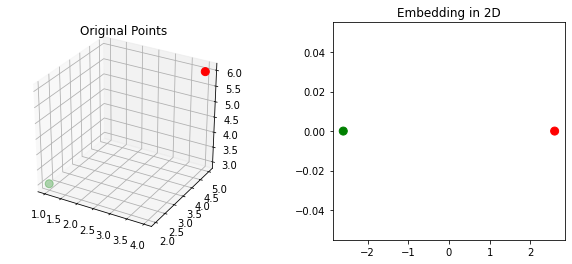

In [ ]:
colors = ['r', 'g']
size = [64]
fig = plt.figure(2, (10,4))
ax = fig.add_subplot(121, projection='3d')
plt.scatter(Y[:,0], Y[:,1],zs=Y[:,2], s=size, c=colors)
plt.title('Original Points')

ax = fig.add_subplot(122)
plt.scatter(X[:,0], X[:,1], s=size, c=colors)
plt.title('Embedding in 2D')
fig.subplots_adjust(wspace=.4, hspace=0.5)
plt.show()


In [ ]:
error = 0.0
total = 0
for i in range(0, n):
    for j in range(i+1, n):
        error += (numpy.linalg.norm(X[i] - X[j]) - D[i, j]) ** 2
        total += 1
RMSE = numpy.sqrt(error / float(total))
print("RMSE =", RMSE)
if RMSE > 0:
    plt.scatter(X[:,0], X[:,1], c='b', s=40)
    plt.scatter(Y[:,0], Y[:,1], c='r', s=40)
    plt.show()
    #sys.exit(1)
pass


RMSE = 0.0


###  MDS for Distance between Cities

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_mds.py:518: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  "The MDS API has changed. ``fit`` now constructs an"


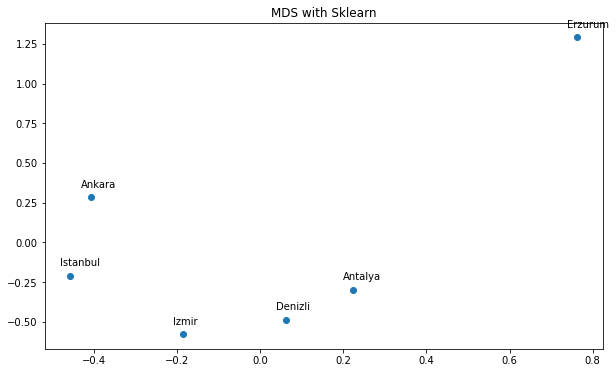


  Stress
  0.18351208780813116


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

cities = {'Istanbul':[0,350,329,360,483,1048],
          'Ankara':[350,0,522,405,387,719],
          'Izmir':[329,522,0,186,359,1231],
          'Denizli':[360,405,186,0,174,1082],
          'Antalya':[483,387,359,174,0,981],
          'Erzurum':[1048,719,1231,1082,981,0],
          }
df = pd.DataFrame(cities, index =['Istanbul','Ankara','Izmir','Denizli','Antalya','Erzurum'])

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(df)


from sklearn.manifold import MDS
mds_sklearn = MDS(n_components=2)
x_sklearn = mds_sklearn.fit_transform(x_scaled)
cities = ['Istanbul','Ankara','Izmir','Denizli','Antalya','Erzurum']

plt.figure(figsize=(10,6))
plt.scatter(x_sklearn[:,0],x_sklearn[:,1])
plt.title('MDS with Sklearn')
for label, x, y in zip(cities, x_sklearn[:, 0], x_sklearn[:, 1]):
    plt.annotate(
        label,
        xy = (x, y), 
        xytext = (-10, 10),
        textcoords = 'offset points'
    )
plt.show()
print("\n  Stress\n ",mds_sklearn.stress_)

  1. The result is seen in Figure . In addition, the stress value is 0.188. Before moving on to the topic of stress, let’s discuss the results obtained. 

  2. Initially, we had a 6 x 6 matrix, and the dimensionality of the dataset is reduced to 6 x 2 by applying MDS, and then it is visualized.

  3. If the coordinate plane is considered, the position of the (x,y) point is determined by the reference (0,0) origin point. Any (x,y) point is positioned regarding the (0,0) point. 
  
  4. In MDS, on the other hand, each column pair is calculated with the specified distance type. This is why distance is preserved with MDS.
  
  5. When we look at Figure , it is seen that Erzurum is the farthest from other cities. 
  
  6. Similarly, cities that are close to each other are positioned close after MDS is applied, so when we look at the MDS result, a similar picture is encountered. The dataset is viewed from a different angle while maintaining the distance relationship between the data.



## Goodness of fit = Stress 

 1. A specific expression is needed to determine to what extent dimensionality reduction is required in data analysis applications.
 
 2.  In PCA, cumulative variance is determined by drawing a scree plot. 
 
 3. In MDS, the distances are modeled. Therefore, the best choice for MDS is one based on the differences between the actual distances and their estimated values. This measure is called ***stress.***

 4. Kruskal Stress:

$ stress= \sqrt{\frac{\Sigma{(mapped \, distance-Euclidean \,distance)}}{\Sigma Euclidean \,distance}}$

 5. sammon Stress:

 $ stress= \sqrt{\frac{\Sigma{(original \, distance-Euclidean \,distance)}}{\Sigma Euclidean \,distance}}$

 
 6.  The code block where the stress graph of the above example is drawn and its output are as follows:



/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_mds.py:518: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  "The MDS API has changed. ``fit`` now constructs an"
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_mds.py:518: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  "The MDS API has changed. ``fit`` now constructs an"
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_mds.py:518: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  "The MDS API has changed. ``fit`` now constructs an"
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_mds.py:518: UserWarning: The MDS API has changed. ``fit`` 

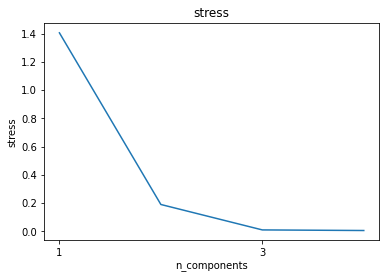

In [ ]:
from sklearn.manifold import MDS
stress = []
for i in range(1, 5):
    mds_sklearn = MDS(n_components=i)
    # Apply MDS
    pts = mds_sklearn.fit_transform(x_scaled)
    # Retrieve the stress value
    stress.append(mds_sklearn.stress_)
# Plot stress vs. n_components    
plt.plot(range(1, 5), stress)
plt.xticks(range(1, 5, 2))
plt.title('stress')
plt.xlabel('n_components')
plt.ylabel('stress')
plt.show()

1. The result  for stress vs no of components is shown in Figure  above. 

2. In the original paper on MDS, Kruskal (1964) gave the following advice about stress values based on his experience:

  0.2   – poor

  0.1   – fair

  0.05  – good

  0.025 – excellent

  0     – perfect

3. Nowadays, academic studies are of the opinion that it is misleading to follow this table according to the size of the dataset and the quality of the data.





### PCA vs MDS


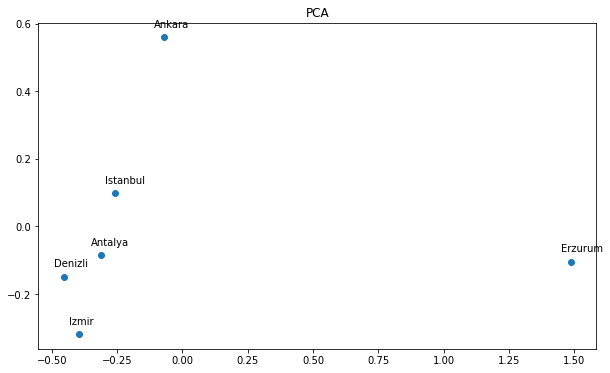

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_scaled)
cities = ['Istanbul','Ankara','Izmir','Denizli','Antalya','Erzurum']

plt.figure(figsize=(10,6))
plt.scatter(x_pca[:,0],x_pca[:,1])
plt.title('PCA')
for label, x, y in zip(cities, x_pca[:, 0], x_pca[:, 1]):
    plt.annotate(
        label,
        xy = (x, y), 
        xytext = (-10, 10),
        textcoords = 'offset points'
    )
plt.show()

 1. PCA has been applied to the above dataset in the code block above and the result is shown in Figure ABOVE.

 2. The procedure performed by maintaining distance in MDS is performed by considering variance-correlation values in PCA. 
 
 3. Minimizing the linear distance using Euclidean Distance is similar to maximizing the linear correlations. 
 
 4. Therefore, it can be said that the 2D graphics of the PCA and MDS applied dataset would have similar characteristics. Of course, this only applies to the use of MDS with Euclidean distance. 
 
 5. In addition, different distance methods can be applied according to the project. (For example, Euclidean distance can be weak for large datasets.) 


### Different Distance Approaches
 1. It has already been mentioned that the Euclidean distance is used by default in the Sklearn library. 
 2. In addition, various distances can be used by setting dissimilarities = “precomputed”. 
 3. In the code block below, MDS is applied to the fetch_olivetti_faces dataset in the sklearn library at various distances and visualized in 2D.



downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_distance_metric.py:14: FutureWarning: sklearn.neighbors.DistanceMetric has been moved to sklearn.metrics.DistanceMetric in 1.0. This import path will be removed in 1.3
  category=FutureWarning,


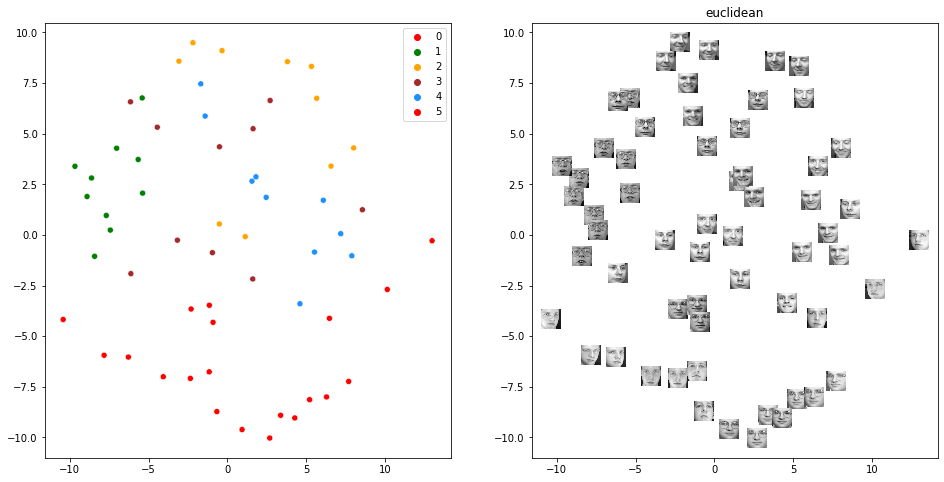

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_distance_metric.py:14: FutureWarning: sklearn.neighbors.DistanceMetric has been moved to sklearn.metrics.DistanceMetric in 1.0. This import path will be removed in 1.3
  category=FutureWarning,


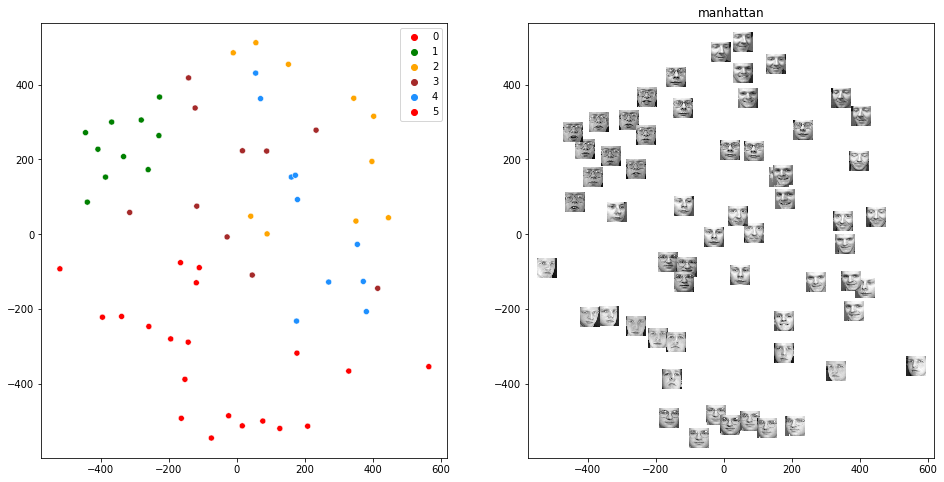

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_distance_metric.py:14: FutureWarning: sklearn.neighbors.DistanceMetric has been moved to sklearn.metrics.DistanceMetric in 1.0. This import path will be removed in 1.3
  category=FutureWarning,


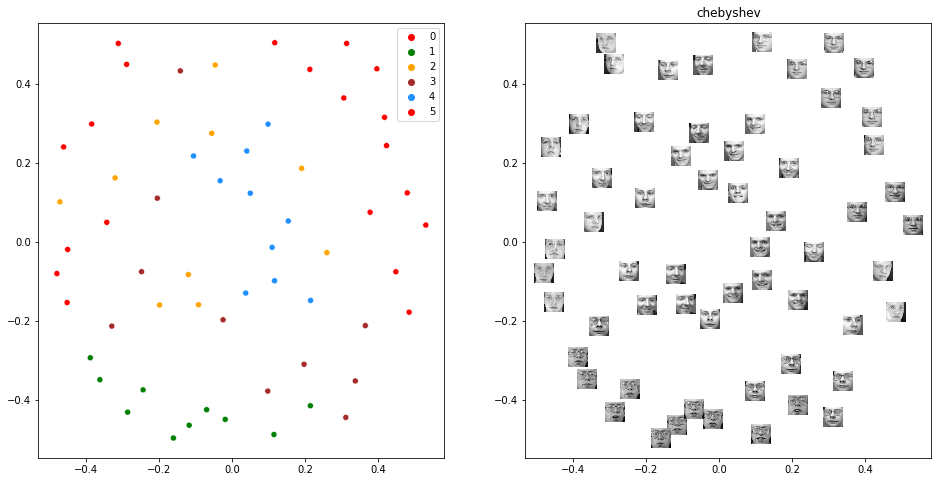

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_distance_metric.py:14: FutureWarning: sklearn.neighbors.DistanceMetric has been moved to sklearn.metrics.DistanceMetric in 1.0. This import path will be removed in 1.3
  category=FutureWarning,


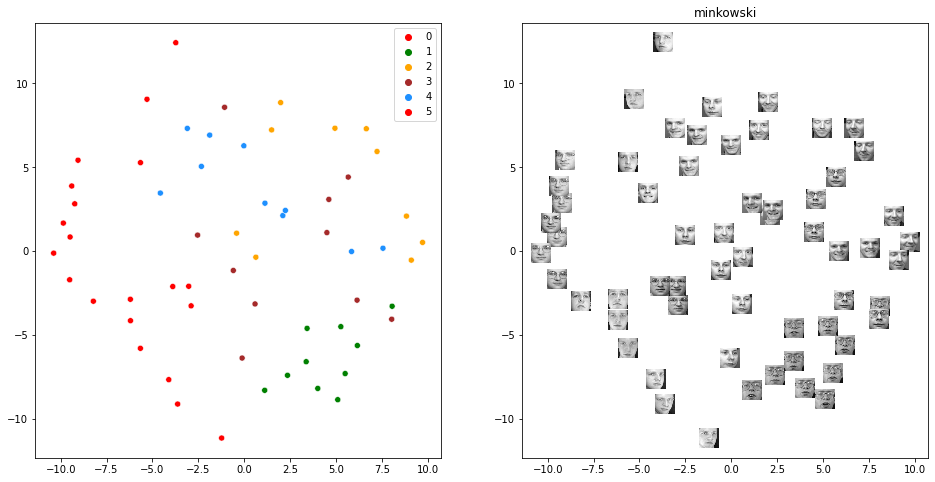

In [ ]:
import seaborn as sns         
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import MDS


from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces()
x_faces = faces.data
y_faces = faces.target
i = y_faces < 6
x_faces = x_faces[i,:]
y_faces = y_faces[i]

from sklearn.neighbors import DistanceMetric

def MDS_distance(X, y, distance, title):    
    dist = DistanceMetric.get_metric(distance)
    dist_matrix = dist.pairwise(X)
    
    mds = MDS(n_components=2, dissimilarity='precomputed')
    n_mds = mds.fit_transform(dist_matrix)
    fig = plt.figure(2, (16,8))
    ax = fig.add_subplot(1,2,1)    
    ax = sns.scatterplot(x=n_mds[:, 0], y=n_mds[:, 1],hue=y,
                         palette=['red','green','orange','brown','dodgerblue','red'],legend='full')

    ax = fig.add_subplot(1,2,2)
    plt.scatter(n_mds[:, 0], n_mds[:, 1])
    
    for x, ind in zip(X, range(n_mds.shape[0])):
        im = x.reshape(64,64)
        imagebox = OffsetImage(im, zoom=0.3, cmap=plt.cm.gray)
        i = n_mds[ind, 0]
        j = n_mds[ind, 1]
        ab = AnnotationBbox(imagebox, (i, j), frameon=False)
        ax.add_artist(ab)
    plt.title(title)    
    plt.show()
    
MDS_distance(x_faces,y_faces,"euclidean",'euclidean')
MDS_distance(x_faces,y_faces,"manhattan",'manhattan')
MDS_distance(x_faces,y_faces,"chebyshev",'chebyshev')
MDS_distance(x_faces,y_faces,"minkowski",'minkowski')

1. Looking at the images above, it is seen that each result is shaped according to a different characteristic based on distance. 
2. It should be chosen according to the structure of the dataset used while making the selection. 
3. For example, biologists working on genes should choose and use log-fold changes, as they are interested in log-fold changes on genes.



S curve
The 3D S curve is imported in the code block below. It is rendered 2D and visualized with PCA and MDS. The results are shown in Figure below.



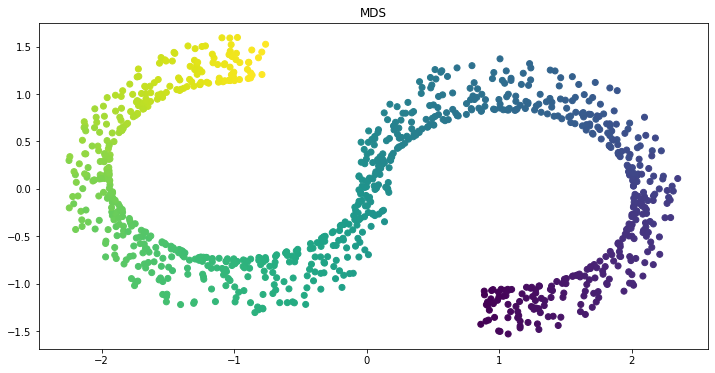

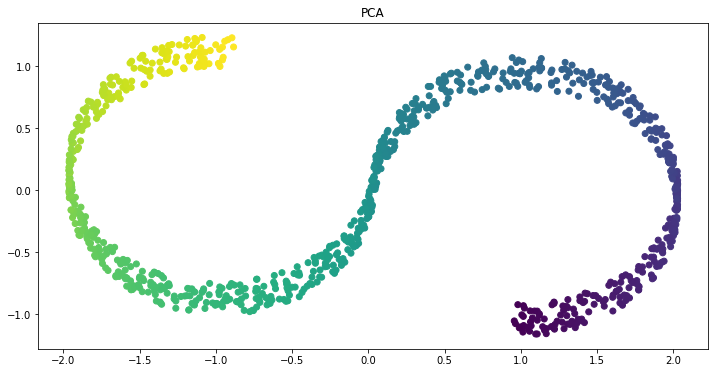

In [ ]:
from sklearn.datasets import make_s_curve
import pandas as pd
import matplotlib.pyplot as plt

x, y = make_s_curve(n_samples=1000)


from sklearn.manifold import MDS
mds = MDS(n_components=2)
x_mds = mds.fit_transform(x)
plt.figure(figsize=(12,6))
plt.title('MDS')
plt.scatter(x_mds[:,0],x_mds[:,1], c=y)

from sklearn.decomposition import PCA
X_pca = PCA(n_components=2).fit_transform(x)
plt.figure(figsize=(12,6))
plt.title('PCA')
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y);

### Digits
 1. The First 5 labels of the Digits dataset, that is 0,1,2,3,4 are imported.
 2. The shape of the dataset is converted from 901 x 64 to 901 x 2 by applying the MDS and PCA processes separately. 
 3.Then visualization is performed and the result is as in Figure below.



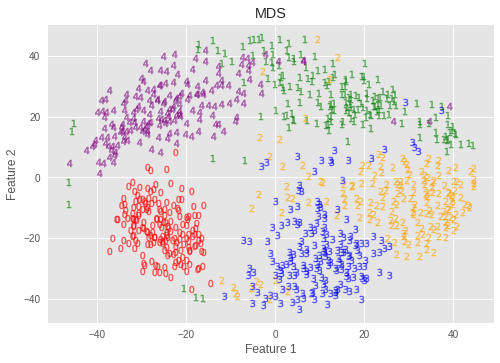

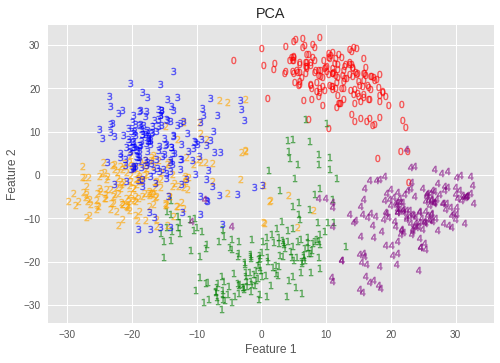

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

digits = load_digits(n_class=5)
x, y  = digits.data, digits.target

def plot_digits(X,title):
    with plt.style.context(("seaborn", "ggplot")):
        colors = ['red','green','orange','blue','purple','cyan','magenta', 'firebrick','indigo']
        for digit in range(0,6):
            plt.scatter(X[y==digit,0],X[y==digit,1], c = colors[digit], marker="$"+str(digit)+"$",s =50, alpha=0.5)
        plt.xlabel("Feature 1")
        plt.ylabel("Feature 2")
        plt.title(title)
        plt.show()

from sklearn.manifold import MDS
mds = MDS(n_components=2)
x_mds = mds.fit_transform(x)
plot_digits(x_mds,"MDS")

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x)
plot_digits(x_pca,"PCA")


After the MDS process, it is seen that especially the 2. and 3. groups are formed in better clusters compared to PCA. After this stage, the application of various machine learning processes will give effective results.



### Metric MDS and Non-Metric MDS

1. So far, it has been focused on metric (classical) multidimensional scaling, also called Principal Coordinate Analysis (PCoA). In this method, dimensionality reduction was made by considering the distances between the features, and visualization was performed.

2. The non-metric MDS is suitable for ordinal datasets. For example, in the survey data collected during market research, let’s say how many points will be given to the X brand car over 10. Here, 8 points would mean to have better quality than 3 points. Labels 0–1–2–3–4 were used in the digits dataset above, but neither had an advantage over the other. In another example, when psychiatric patients are asked to rate their mood, a high score would mean something different from a low score.

3. In a nutshell, while metric MDS shows a linear relationship, nonmetric MDS (also called ordinal MDS) is described by a set of curves that depend only on the value of the ranks.[5] By setting the metric = False, it can be used as non-metric MDS presented in the Sklearn library.

